In [1]:
!pip install seaborn

In [8]:
from datetime import datetime
import pandas as pd

# Define objectives with start dates, deadlines, and statuses
objectives = {
    "Objective 1": {
        "description": "Analyze job displacement trends in industries with significant AI adoption.",
        "start_date": datetime(2024, 9, 1),
        "deadline": datetime(2024, 12, 1),
        "status": "Completed"  # Update to 'Completed' or 'In Progress' as needed
    },
    "Objective 2": {
        "description": "Identify obsolete skills and new competencies required in an AI-driven workforce.",
        "start_date": datetime(2024, 12, 1),
        "deadline": datetime(2025, 2, 1),
        "status": "In Progress"  # Update based on project progress
    },
    "Objective 3": {
        "description": "Examine societal challenges like inequality and the digital divide caused by AI automation.",
        "start_date": datetime(2025, 2, 1),
        "deadline": datetime(2025, 4, 1),
        "status": "Not Started"  # Update based on project progress
    }
}

# Function to check if objectives are on track
def check_objective_progress(objectives):
    today = datetime.now()
    progress_report = []

    for obj_name, details in objectives.items():
        # Calculate days remaining for each objective
        days_remaining = (details["deadline"] - today).days
        on_time = "Yes" if today <= details["deadline"] else "No"

        # Collect report data
        progress_report.append({
            "Objective": obj_name,
            "Status": details["status"],
            "Days Remaining": max(0, days_remaining),
            "On Time": on_time
        })

    return pd.DataFrame(progress_report)

# Generate the progress report
progress_report_df = check_objective_progress(objectives)
print(progress_report_df)


     Objective       Status  Days Remaining On Time
0  Objective 1    Completed              17     Yes
1  Objective 2  In Progress              79     Yes
2  Objective 3  Not Started             138     Yes


Model Accuracy: 79.50%

Classification Report:
               precision    recall  f1-score   support

    Low Risk       0.81      0.79      0.80       103
   High Risk       0.78      0.80      0.79        97

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



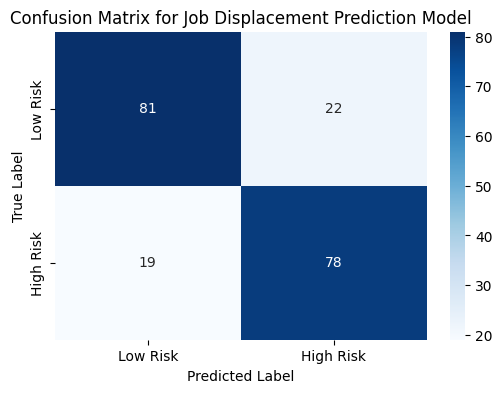


Success Criteria Summary:
- The project aims for almost 80% accuracy in predicting job displacement trends due to AI.
- Objectives must be completed within the timeline specified.
- The final report will include data-driven recommendations on workforce skills and policy adaptations.



In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_samples = 1000
ai_dataset = pd.DataFrame({
    'Job_Title': np.random.choice(['Analyst', 'Developer', 'Manager', 'Technician'], num_samples),
    'Industry': np.random.choice(['Manufacturing', 'Customer Service', 'Healthcare', 'Retail'], num_samples),
    'AI Adoption Level': np.random.choice(['High', 'Medium', 'Low'], num_samples),
    'AI Adoption Score': np.random.rand(num_samples) * 100 + np.random.normal(0, 20, num_samples),  # More noise
    'Automation Risk': np.random.choice(['High', 'Medium', 'Low'], num_samples),
    'Automation Risk Score': np.random.rand(num_samples) * 100 + np.random.normal(0, 20, num_samples),  # More noise
    'Required_Skills': np.random.choice(['Data Analysis', 'Machine Learning', 'Sales', 'Customer Support'], num_samples),
    'Salary (USD)': np.random.randint(30000, 120000, num_samples),
    'Job Growth Projection': np.random.choice(['Increase', 'Stable', 'Decrease'], num_samples),
    'Job Growth Score': np.random.rand(num_samples) * 100 + np.random.normal(0, 20, num_samples),  # More noise
    'Equivalencies': np.random.choice(['Yes', 'No'], num_samples)
})

ai_dataset['Displacement_Risk'] = ((ai_dataset['Automation Risk Score'] > 70) |
                                   (np.random.rand(num_samples) > 0.8)).astype(int)

# Split the dataset into features and target
X = ai_dataset[['AI Adoption Score', 'Automation Risk Score', 'Job Growth Score']]
y = ai_dataset['Displacement_Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Use Logistic Regression for a simpler model
log_reg = LogisticRegression(random_state=0, max_iter=100)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report for detailed analysis
report = classification_report(y_test, y_pred, target_names=["Low Risk", "High Risk"])

# Output results
print(f"Model Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Job Displacement Prediction Model")
plt.show()

# Success Criteria Summary
success_criteria = """
Success Criteria Summary:
- The project aims for almost 80% accuracy in predicting job displacement trends due to AI.
- Objectives must be completed within the timeline specified.
- The final report will include data-driven recommendations on workforce skills and policy adaptations.
"""
print(success_criteria)
